In [1]:
from os import environ
environ['train_device'] = 'cuda:1' # training device: 'cpu' or 'cuda:X'
environ['store_device'] = 'cuda:1' # Data storing device:  'cpu' or 'cuda:X'

dataset_file_MC = '/data/kk4796/datasets/dataset_multicomp_fusion_train_val.pkl' 
test_dataset_file_MC = '/data/kk4796/datasets/dataset_multicomp_fusion_test.pkl' 

dataset_file_SC = '/data/kk4796/datasets/dataset_singlecomp_13M115_train_val.pkl'
test_dataset_file_SC = '/data/kk4796/datasets/dataset_singlecomp_13M115_test.pkl'


%run utils_MultiLabel_vs_Classical.py # imports and defines some utils functions

## Data loading

In [2]:
# Filtering the schedules

def filter_schedule_MC(schedule_str): # filter the LI schedules for MC, return true if we want the passed schedule to be dropped
    
    regex1 = "^I\(\{[C0-9,]+\},L[0-9]+,L[0-9]+\)$"
    regex2 = "F\(\{[C0-9,]+\},L[0-9]+\)I\(\{[C0-9,]+\},L[0-9]+,L[0-9]+\)$"
    if re.search(regex1, schedule_str) or re.search(regex2, schedule_str) : # drops all the schedules except the loop interchanges
        return True
    if schedule_str=="":
        return True
    return False

def filter_schedule_SC(schedule_str): # filter the LI schedules for SC, return true if we want the passed schedule to be dropped
    
    regex = "I\(L[0-9]+,L[0-9]+\)$"
    if re.search(regex, schedule_str): # drops all the schedules except the loop interchanges
        return True
    if schedule_str=="":
        return True
    return False

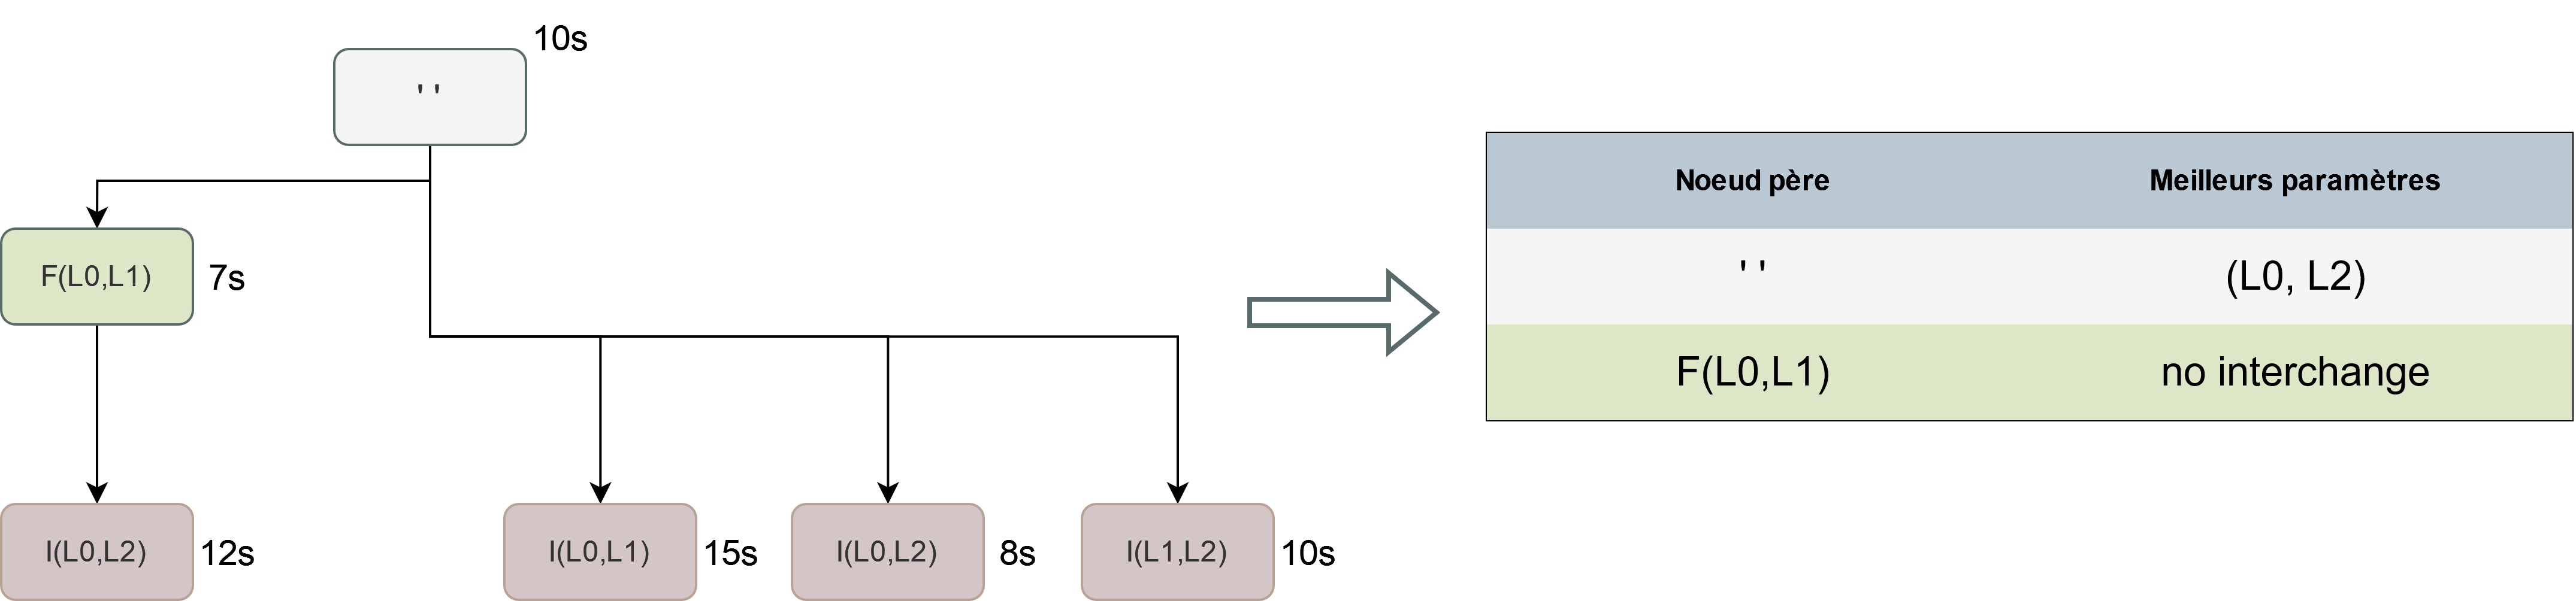

In [3]:
# Loading the data with classical representation ( 106 output)
train_val_dataset_106, val_bl_106, val_indices_106, train_bl_106, train_indices_106 = load_merge_data_classical(dataset_file_MC, dataset_file_SC, 0.2, max_batch_size=832, filter_func_MC=filter_schedule_MC, filter_func_SC=filter_schedule_SC)
test_dataset_106, test_bl_106, test_indices_106, _, _ = load_merge_data_classical(test_dataset_file_MC, test_dataset_file_SC, 1, filter_func_MC=filter_schedule_MC, filter_func_SC=filter_schedule_SC)

# Loading the data with multi_label representation ( 15 output)
train_val_dataset_15, val_bl_15, val_indices_15, train_bl_15, train_indices_15 = load_merge_data_multiLabel(dataset_file_MC, dataset_file_SC, 0.2, max_batch_size=832, filter_func_MC=filter_schedule_MC, filter_func_SC=filter_schedule_SC)
test_dataset_15, test_bl_15, test_indices_15, _, _ = load_merge_data_multiLabel(test_dataset_file_MC, test_dataset_file_SC, 1, filter_func_MC=filter_schedule_MC, filter_func_SC=filter_schedule_SC)

100%|██████████| 131466/131466 [02:58<00:00, 737.95it/s] 


Number of batches 172
Number of batches dropped due to too much memory accesses:5897
Data loaded
Sizes: (34, 138) batches


100%|██████████| 14607/14607 [00:18<00:00, 781.45it/s] 


Number of batches 22
Number of batches dropped due to too much memory accesses:642
Data loaded
Sizes: (22, 0) batches


100%|██████████| 131466/131466 [03:02<00:00, 721.08it/s] 


Number of batches 172
Number of batches dropped due to too much memory accesses:5897
Data loaded
Sizes: (34, 138) batches


100%|██████████| 14607/14607 [00:19<00:00, 733.70it/s] 

Number of batches 22
Number of batches dropped due to too much memory accesses:642
Data loaded
Sizes: (22, 0) batches


In [4]:
# Sanity check
output106 = test_dataset_106.Y[1][0]
output15 = test_dataset_15.Y[1][0]

print(output106, len(output106))
print(output15, len(output15))

for i in range(len(test_dataset_106.X)):
    print(test_dataset_106.X[i][1].size(), get_tree_footprint(test_dataset_106.X[i][0]) )  
    #batch size, number of computations, size of each comps vector
    
for i in range(len(test_dataset_15.X)):
    print(test_dataset_15.X[i][1].size(), get_tree_footprint(test_dataset_15.X[i][0]) )  
    #batch size, number of computations, size of each comps vector

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:1') 106
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:1') 15
torch.Size([54, 2, 1272]) <BL0<BL1<BL2[CI0CI1]EL2>EL1>EL0>
torch.Size([28, 2, 1272]) <BL0<BL1<BL2[CI0]EL2><BL3[CI1]EL3>EL1>EL0>
torch.Size([4, 2, 1272]) <BL0<BL1<BL2<BL3[CI0]EL3><BL4[CI1]EL4>EL2>EL1>EL0>
torch.Size([83, 2, 1272]) <BL0<BL1[CI0CI1]EL1>EL0>
torch.Size([5, 2, 1272]) <BL0<BL1<BL2<BL3[CI0]EL3>EL2><BL4[CI1]EL4>EL1>EL0>
torch.Size([1, 2, 1272]) <BL0<BL1<BL2<BL3[CI0]EL3><BL4<BL5[CI1]EL5>EL4>EL2>EL1>EL0>
torch.Size([3, 2, 1272]) <BL0<BL1<BL2<BL3[CI0CI1]EL3>EL2>EL1>EL0>
torch.Size([7, 2, 1272]) <BL0<BL1<BL2[CI0]EL2><BL3<BL4[CI1]EL4>EL

## Models Definition and Training

### Classical 

Epoch 1/1000:  train Loss: 267.6103   val Loss: 151.2066   time: 5.51s   best: 151.2066
Epoch 2/1000:  train Loss: 161.4211   val Loss: 142.8788   time: 1.26s   best: 142.8788
Epoch 3/1000:  train Loss: 150.8268   val Loss: 139.3316   time: 1.26s   best: 139.3316
Epoch 4/1000:  train Loss: 146.0207   val Loss: 137.3632   time: 1.30s   best: 137.3632
Epoch 5/1000:  train Loss: 143.2608   val Loss: 135.7731   time: 1.18s   best: 135.7731
Epoch 6/1000:  train Loss: 141.2041   val Loss: 134.8170   time: 1.18s   best: 134.8170
Epoch 7/1000:  train Loss: 139.4659   val Loss: 134.0153   time: 1.18s   best: 134.0153
Epoch 8/1000:  train Loss: 137.9872   val Loss: 133.0546   time: 1.17s   best: 133.0546
Epoch 9/1000:  train Loss: 136.8343   val Loss: 131.9230   time: 1.17s   best: 131.9230
Epoch 10/1000:  train Loss: 135.2046   val Loss: 130.5783   time: 1.17s   best: 130.5783
Epoch 11/1000:  train Loss: 134.2300   val Loss: 129.2714   time: 1.43s   best: 129.2714
Epoch 12/1000:  train Loss: 13

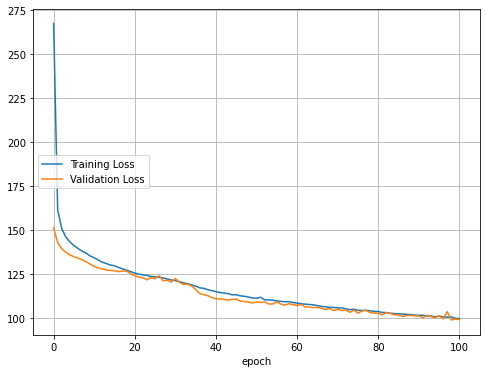

Epoch 102/1000:  train Loss: 99.5102   val Loss: 99.2279   time: 1.31s   best: 98.7646
Epoch 103/1000:  train Loss: 99.4702   val Loss: 98.4933   time: 1.31s   best: 98.4933
Epoch 104/1000:  train Loss: 99.2493   val Loss: 98.8074   time: 1.30s   best: 98.4933
Epoch 105/1000:  train Loss: 99.3333   val Loss: 98.7713   time: 1.29s   best: 98.4933
Epoch 106/1000:  train Loss: 99.5133   val Loss: 100.8073   time: 1.28s   best: 98.4933
Epoch 107/1000:  train Loss: 99.0394   val Loss: 97.7813   time: 1.28s   best: 97.7813
Epoch 108/1000:  train Loss: 98.4903   val Loss: 97.4024   time: 1.28s   best: 97.4024
Epoch 109/1000:  train Loss: 98.4685   val Loss: 99.2688   time: 1.28s   best: 97.4024
Epoch 110/1000:  train Loss: 98.4330   val Loss: 97.6614   time: 1.28s   best: 97.4024
Epoch 111/1000:  train Loss: 98.3991   val Loss: 97.1191   time: 1.27s   best: 97.1191
Epoch 112/1000:  train Loss: 98.0448   val Loss: 97.3459   time: 1.27s   best: 97.1191
Epoch 113/1000:  train Loss: 97.9531   val

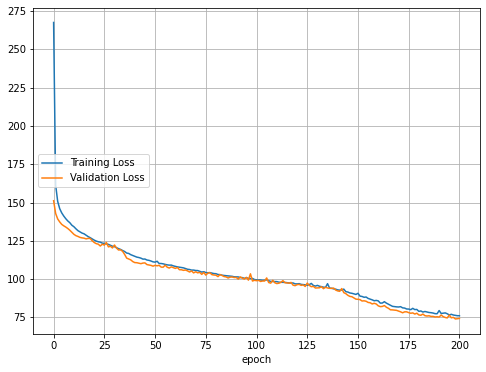

Epoch 202/1000:  train Loss: 75.8500   val Loss: 74.3534   time: 1.18s   best: 74.0007
Epoch 203/1000:  train Loss: 76.1449   val Loss: 74.3232   time: 1.18s   best: 74.0007
Epoch 204/1000:  train Loss: 76.3877   val Loss: 73.7143   time: 1.18s   best: 73.7143
Epoch 205/1000:  train Loss: 75.5532   val Loss: 74.1380   time: 1.18s   best: 73.7143
Epoch 206/1000:  train Loss: 75.5515   val Loss: 73.5351   time: 1.18s   best: 73.5351
Epoch 207/1000:  train Loss: 75.6099   val Loss: 73.9841   time: 1.18s   best: 73.5351
Epoch 208/1000:  train Loss: 76.2276   val Loss: 73.6676   time: 1.17s   best: 73.5351
Epoch 209/1000:  train Loss: 75.1598   val Loss: 72.9734   time: 1.17s   best: 72.9734
Epoch 210/1000:  train Loss: 75.1452   val Loss: 73.2564   time: 1.19s   best: 72.9734
Epoch 211/1000:  train Loss: 75.1764   val Loss: 73.9087   time: 1.21s   best: 72.9734
Epoch 212/1000:  train Loss: 75.4867   val Loss: 72.8098   time: 1.21s   best: 72.8098
Epoch 213/1000:  train Loss: 74.8537   val 

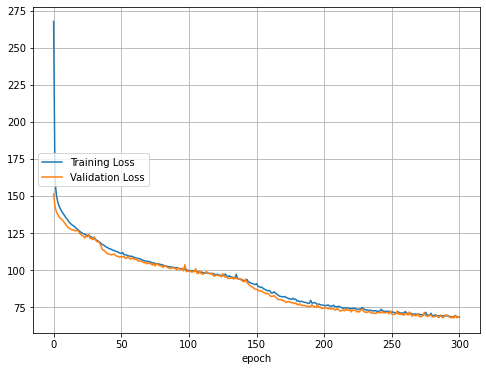

Epoch 302/1000:  train Loss: 67.9873   val Loss: 68.3752   time: 1.18s   best: 67.5732
Epoch 303/1000:  train Loss: 68.4329   val Loss: 67.6274   time: 1.18s   best: 67.5732
Epoch 304/1000:  train Loss: 68.0699   val Loss: 70.5335   time: 1.18s   best: 67.5732
Epoch 305/1000:  train Loss: 68.4669   val Loss: 67.2174   time: 1.17s   best: 67.2174
Epoch 306/1000:  train Loss: 67.7441   val Loss: 67.7842   time: 1.17s   best: 67.2174
Epoch 307/1000:  train Loss: 67.7313   val Loss: 66.8958   time: 1.17s   best: 66.8958
Epoch 308/1000:  train Loss: 67.5204   val Loss: 67.4694   time: 1.19s   best: 66.8958
Epoch 309/1000:  train Loss: 67.6411   val Loss: 66.7231   time: 1.20s   best: 66.7231
Epoch 310/1000:  train Loss: 67.4067   val Loss: 67.2291   time: 1.21s   best: 66.7231
Epoch 311/1000:  train Loss: 67.4128   val Loss: 67.0527   time: 1.21s   best: 66.7231
Epoch 312/1000:  train Loss: 67.3368   val Loss: 66.6348   time: 1.25s   best: 66.6348
Epoch 313/1000:  train Loss: 66.9104   val 

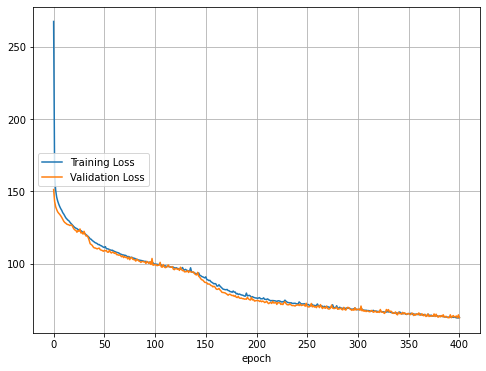

Epoch 402/1000:  train Loss: 62.7761   val Loss: 62.3029   time: 1.30s   best: 62.3029
Epoch 403/1000:  train Loss: 62.2635   val Loss: 62.9044   time: 1.30s   best: 62.3029
Epoch 404/1000:  train Loss: 62.2018   val Loss: 63.1461   time: 1.30s   best: 62.3029
Epoch 405/1000:  train Loss: 63.6190   val Loss: 63.4916   time: 1.31s   best: 62.3029
Epoch 406/1000:  train Loss: 62.4117   val Loss: 62.0081   time: 1.34s   best: 62.0081
Epoch 407/1000:  train Loss: 62.1703   val Loss: 62.4627   time: 1.34s   best: 62.0081
Epoch 408/1000:  train Loss: 62.2741   val Loss: 63.7931   time: 1.34s   best: 62.0081
Epoch 409/1000:  train Loss: 61.9314   val Loss: 62.1379   time: 1.35s   best: 62.0081
Epoch 410/1000:  train Loss: 61.8566   val Loss: 62.7333   time: 1.34s   best: 62.0081
Epoch 411/1000:  train Loss: 62.4425   val Loss: 62.9217   time: 1.33s   best: 62.0081
Epoch 412/1000:  train Loss: 62.0144   val Loss: 62.6919   time: 1.32s   best: 62.0081
Epoch 413/1000:  train Loss: 62.0150   val 

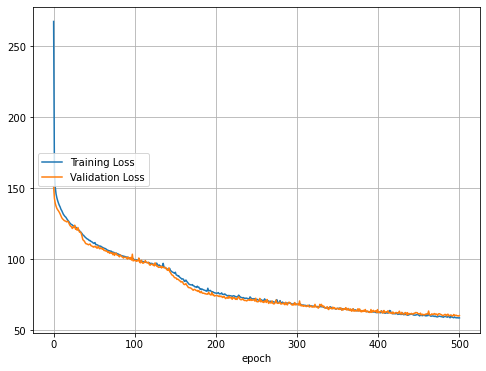

Epoch 502/1000:  train Loss: 58.9162   val Loss: 60.0999   time: 1.21s   best: 59.8815
Epoch 503/1000:  train Loss: 58.8949   val Loss: 60.3698   time: 1.21s   best: 59.8815
Epoch 504/1000:  train Loss: 58.9288   val Loss: 60.0446   time: 1.21s   best: 59.8815
Epoch 505/1000:  train Loss: 58.3642   val Loss: 60.5299   time: 1.19s   best: 59.8815
Epoch 506/1000:  train Loss: 58.4570   val Loss: 60.6071   time: 1.19s   best: 59.8815
Epoch 507/1000:  train Loss: 58.5188   val Loss: 59.5193   time: 1.19s   best: 59.5193
Epoch 508/1000:  train Loss: 58.4625   val Loss: 60.3700   time: 1.19s   best: 59.5193
Epoch 509/1000:  train Loss: 58.2240   val Loss: 59.9698   time: 1.18s   best: 59.5193
Epoch 510/1000:  train Loss: 58.1507   val Loss: 60.0343   time: 1.18s   best: 59.5193
Epoch 511/1000:  train Loss: 58.1786   val Loss: 59.9387   time: 1.18s   best: 59.5193
Epoch 512/1000:  train Loss: 58.2031   val Loss: 60.1160   time: 1.18s   best: 59.5193
Epoch 513/1000:  train Loss: 57.9971   val 

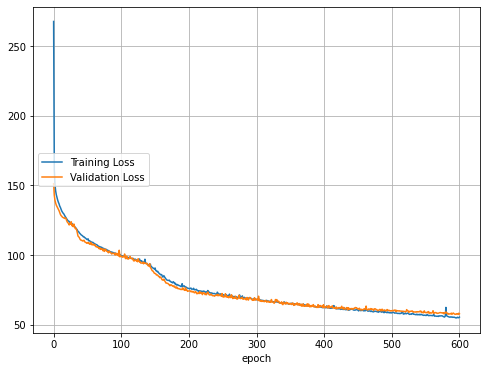

Epoch 602/1000:  train Loss: 55.4625   val Loss: 57.6223   time: 1.19s   best: 57.4516
Epoch 603/1000:  train Loss: 55.3622   val Loss: 57.3626   time: 1.18s   best: 57.3626
Epoch 604/1000:  train Loss: 54.8956   val Loss: 57.9047   time: 1.18s   best: 57.3626
Epoch 605/1000:  train Loss: 56.5570   val Loss: 57.7143   time: 1.19s   best: 57.3626
Epoch 606/1000:  train Loss: 54.9881   val Loss: 58.3616   time: 1.18s   best: 57.3626
Epoch 607/1000:  train Loss: 55.5259   val Loss: 57.6038   time: 1.18s   best: 57.3626
Epoch 608/1000:  train Loss: 54.9544   val Loss: 57.2165   time: 1.18s   best: 57.2165
Epoch 609/1000:  train Loss: 54.6776   val Loss: 57.2996   time: 1.18s   best: 57.2165
Epoch 610/1000:  train Loss: 54.8592   val Loss: 57.4335   time: 1.17s   best: 57.2165
Epoch 611/1000:  train Loss: 54.6894   val Loss: 57.1551   time: 1.19s   best: 57.1551
Epoch 612/1000:  train Loss: 55.0708   val Loss: 57.3360   time: 1.20s   best: 57.1551
Epoch 613/1000:  train Loss: 54.8733   val 

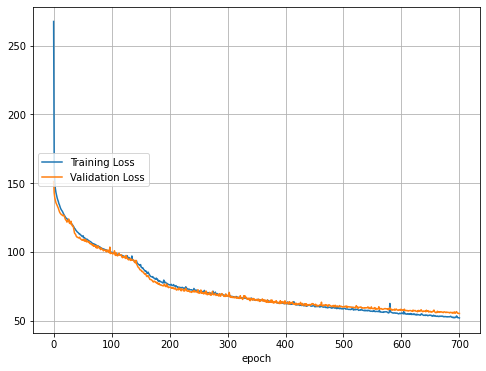

Epoch 702/1000:  train Loss: 51.8863   val Loss: 55.6769   time: 1.28s   best: 55.1624
Epoch 703/1000:  train Loss: 52.1399   val Loss: 55.2175   time: 1.27s   best: 55.1624
Epoch 704/1000:  train Loss: 51.9678   val Loss: 55.2254   time: 1.28s   best: 55.1624
Epoch 705/1000:  train Loss: 52.0451   val Loss: 54.8915   time: 1.31s   best: 54.8915
Epoch 706/1000:  train Loss: 51.7811   val Loss: 55.2695   time: 1.33s   best: 54.8915
Epoch 707/1000:  train Loss: 51.9750   val Loss: 55.5953   time: 1.32s   best: 54.8915
Epoch 708/1000:  train Loss: 52.2306   val Loss: 55.5315   time: 1.25s   best: 54.8915
Epoch 709/1000:  train Loss: 52.1252   val Loss: 55.2238   time: 1.27s   best: 54.8915
Epoch 710/1000:  train Loss: 52.1010   val Loss: 55.3248   time: 1.36s   best: 54.8915
Epoch 711/1000:  train Loss: 51.7429   val Loss: 55.7197   time: 1.38s   best: 54.8915
Epoch 712/1000:  train Loss: 51.9930   val Loss: 55.3991   time: 1.32s   best: 54.8915
Epoch 713/1000:  train Loss: 51.8220   val 

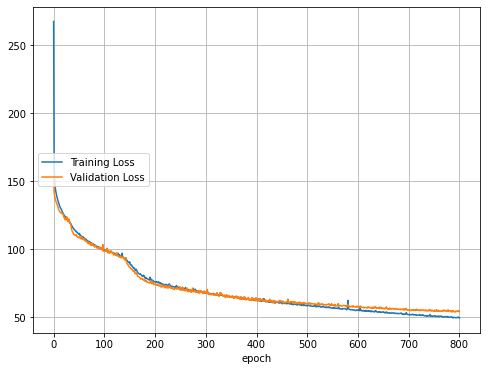

Epoch 802/1000:  train Loss: 49.5470   val Loss: 54.3522   time: 1.21s   best: 53.8262
Epoch 803/1000:  train Loss: 49.7672   val Loss: 54.2296   time: 1.19s   best: 53.8262
Epoch 804/1000:  train Loss: 49.4302   val Loss: 54.1365   time: 1.19s   best: 53.8262
Epoch 805/1000:  train Loss: 49.2656   val Loss: 54.3237   time: 1.19s   best: 53.8262
Epoch 806/1000:  train Loss: 49.5557   val Loss: 54.0589   time: 1.19s   best: 53.8262
Epoch 807/1000:  train Loss: 49.5768   val Loss: 54.4196   time: 1.19s   best: 53.8262
Epoch 808/1000:  train Loss: 49.7165   val Loss: 54.5831   time: 1.19s   best: 53.8262
Epoch 809/1000:  train Loss: 49.3582   val Loss: 54.5339   time: 1.18s   best: 53.8262
Epoch 810/1000:  train Loss: 49.5067   val Loss: 54.1360   time: 1.18s   best: 53.8262
Epoch 811/1000:  train Loss: 49.2639   val Loss: 55.4339   time: 1.18s   best: 53.8262
Epoch 812/1000:  train Loss: 49.6487   val Loss: 55.1329   time: 1.18s   best: 53.8262
Epoch 813/1000:  train Loss: 49.9510   val 

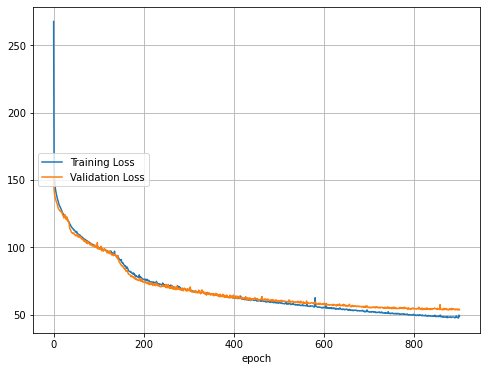

Epoch 902/1000:  train Loss: 47.8639   val Loss: 53.5673   time: 1.19s   best: 53.4105
Epoch 903/1000:  train Loss: 47.5713   val Loss: 53.4087   time: 1.19s   best: 53.4087
Epoch 904/1000:  train Loss: 47.5861   val Loss: 53.2376   time: 1.18s   best: 53.2376
Epoch 905/1000:  train Loss: 47.6207   val Loss: 53.6171   time: 1.18s   best: 53.2376
Epoch 906/1000:  train Loss: 47.5790   val Loss: 53.7085   time: 1.18s   best: 53.2376
Epoch 907/1000:  train Loss: 47.7745   val Loss: 53.2513   time: 1.18s   best: 53.2376
Epoch 908/1000:  train Loss: 47.4497   val Loss: 53.5438   time: 1.18s   best: 53.2376
Epoch 909/1000:  train Loss: 47.7627   val Loss: 53.5776   time: 1.17s   best: 53.2376
Epoch 910/1000:  train Loss: 47.7235   val Loss: 53.5524   time: 1.17s   best: 53.2376
Epoch 911/1000:  train Loss: 47.3788   val Loss: 53.3697   time: 1.19s   best: 53.2376
Epoch 912/1000:  train Loss: 47.3247   val Loss: 53.2297   time: 1.21s   best: 53.2297
Epoch 913/1000:  train Loss: 47.2201   val 

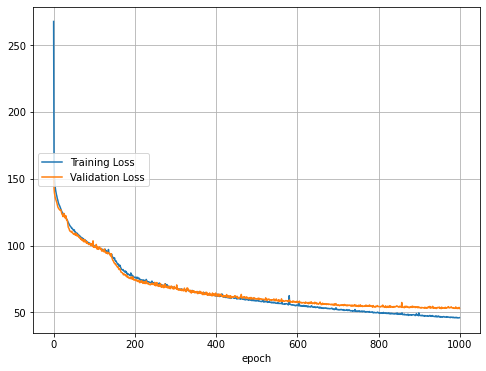

Training complete in 20m 42s   best validation loss: 52.7463


In [5]:
%run utils_MultiLabel_vs_Classical.py
input_size = 1272 

# Definition
model_Classical = None 
model_Classical = Model_Recursive_LSTM_v2(input_size,comp_embed_layer_sizes=[600, 900, 600, 400, 200], drops=[0.275, 0.4, 0.275, 0.175, 0.175], output_size=106)
model_Classical.to(train_device)

criterion_106 = nn.CrossEntropyLoss()
optimizer_106 = AdamW(model_Classical.parameters(),weight_decay=0.375e-2)  

# Training

bl_dict={'train':train_bl_106, 'val':val_bl_106}
log_file_106 = 'log_106.txt'

losses_106, best_model_106 = train_model_Classical(model_Classical, criterion_106, optimizer_106 , max_lr=0.001, dataloader=bl_dict,
                                 num_epochs=1000, logFile=log_file_106, log_every=500)

### Multi-Label

Epoch 1/1000:  train Loss: 0.0158   val Loss: 0.0093   time: 1.26s   best: 0.0093
Epoch 2/1000:  train Loss: 0.0132   val Loss: 0.0092   time: 1.28s   best: 0.0092
Epoch 3/1000:  train Loss: 0.0124   val Loss: 0.0090   time: 1.27s   best: 0.0090
Epoch 4/1000:  train Loss: 0.0119   val Loss: 0.0090   time: 1.22s   best: 0.0090
Epoch 5/1000:  train Loss: 0.0116   val Loss: 0.0089   time: 1.27s   best: 0.0089
Epoch 6/1000:  train Loss: 0.0113   val Loss: 0.0089   time: 1.23s   best: 0.0089
Epoch 7/1000:  train Loss: 0.0110   val Loss: 0.0090   time: 1.17s   best: 0.0089
Epoch 8/1000:  train Loss: 0.0108   val Loss: 0.0088   time: 1.17s   best: 0.0088
Epoch 9/1000:  train Loss: 0.0106   val Loss: 0.0088   time: 1.17s   best: 0.0088
Epoch 10/1000:  train Loss: 0.0105   val Loss: 0.0088   time: 1.17s   best: 0.0088
Epoch 11/1000:  train Loss: 0.0103   val Loss: 0.0088   time: 1.20s   best: 0.0088
Epoch 12/1000:  train Loss: 0.0102   val Loss: 0.0088   time: 1.17s   best: 0.0088
Epoch 13/1000

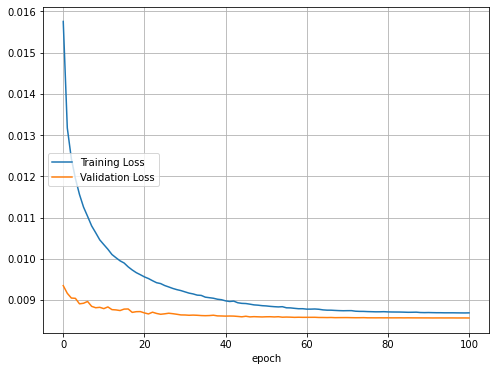

Epoch 102/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.25s   best: 0.0086
Epoch 103/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.25s   best: 0.0086
Epoch 104/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.26s   best: 0.0086
Epoch 105/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.25s   best: 0.0086
Epoch 106/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.19s   best: 0.0086
Epoch 107/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.19s   best: 0.0086
Epoch 108/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.18s   best: 0.0086
Epoch 109/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.19s   best: 0.0086
Epoch 110/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.18s   best: 0.0086
Epoch 111/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.17s   best: 0.0086
Epoch 112/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.18s   best: 0.0086
Epoch 113/1000:  train Loss: 0.0087   val Loss: 0.0086   time: 1.18s   best:

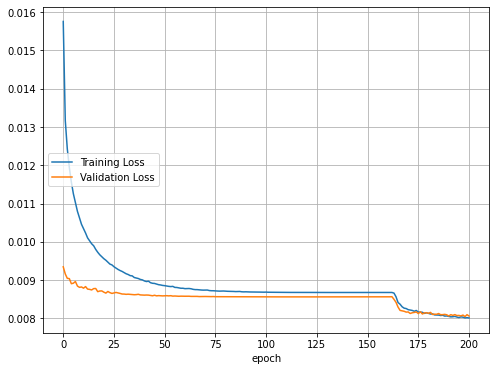

Epoch 202/1000:  train Loss: 0.0080   val Loss: 0.0081   time: 1.30s   best: 0.0080
Epoch 203/1000:  train Loss: 0.0080   val Loss: 0.0081   time: 1.28s   best: 0.0080
Epoch 204/1000:  train Loss: 0.0080   val Loss: 0.0080   time: 1.26s   best: 0.0080
Epoch 205/1000:  train Loss: 0.0080   val Loss: 0.0080   time: 1.27s   best: 0.0080
Epoch 206/1000:  train Loss: 0.0080   val Loss: 0.0080   time: 1.27s   best: 0.0080
Epoch 207/1000:  train Loss: 0.0080   val Loss: 0.0081   time: 1.27s   best: 0.0080
Epoch 208/1000:  train Loss: 0.0080   val Loss: 0.0080   time: 1.27s   best: 0.0080
Epoch 209/1000:  train Loss: 0.0080   val Loss: 0.0080   time: 1.24s   best: 0.0080
Epoch 210/1000:  train Loss: 0.0080   val Loss: 0.0081   time: 1.19s   best: 0.0080
Epoch 211/1000:  train Loss: 0.0080   val Loss: 0.0080   time: 1.19s   best: 0.0080
Epoch 212/1000:  train Loss: 0.0080   val Loss: 0.0080   time: 1.19s   best: 0.0080
Epoch 213/1000:  train Loss: 0.0080   val Loss: 0.0080   time: 1.21s   best:

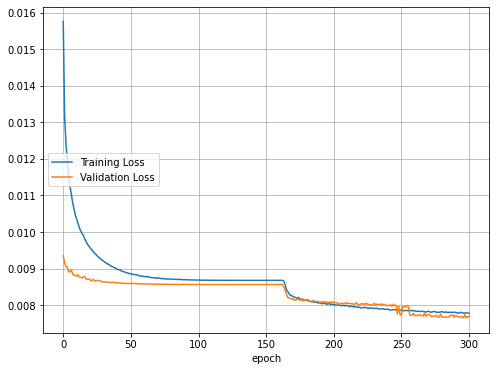

Epoch 302/1000:  train Loss: 0.0078   val Loss: 0.0077   time: 1.31s   best: 0.0076
Epoch 303/1000:  train Loss: 0.0078   val Loss: 0.0077   time: 1.34s   best: 0.0076
Epoch 304/1000:  train Loss: 0.0078   val Loss: 0.0077   time: 1.33s   best: 0.0076
Epoch 305/1000:  train Loss: 0.0078   val Loss: 0.0076   time: 1.29s   best: 0.0076
Epoch 306/1000:  train Loss: 0.0078   val Loss: 0.0077   time: 1.28s   best: 0.0076
Epoch 307/1000:  train Loss: 0.0078   val Loss: 0.0077   time: 1.29s   best: 0.0076
Epoch 308/1000:  train Loss: 0.0078   val Loss: 0.0077   time: 1.32s   best: 0.0076
Epoch 309/1000:  train Loss: 0.0078   val Loss: 0.0076   time: 1.31s   best: 0.0076
Epoch 310/1000:  train Loss: 0.0078   val Loss: 0.0077   time: 1.26s   best: 0.0076
Epoch 311/1000:  train Loss: 0.0078   val Loss: 0.0076   time: 1.22s   best: 0.0076
Epoch 312/1000:  train Loss: 0.0078   val Loss: 0.0076   time: 1.28s   best: 0.0076
Epoch 313/1000:  train Loss: 0.0078   val Loss: 0.0077   time: 1.19s   best:

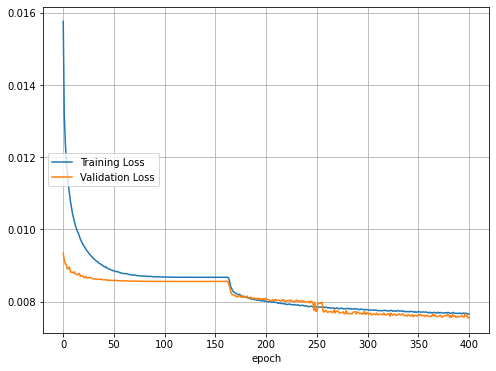

Epoch 402/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.25s   best: 0.0076
Epoch 403/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.24s   best: 0.0076
Epoch 404/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.29s   best: 0.0076
Epoch 405/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.31s   best: 0.0076
Epoch 406/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.33s   best: 0.0076
Epoch 407/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.30s   best: 0.0076
Epoch 408/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.31s   best: 0.0076
Epoch 409/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.33s   best: 0.0076
Epoch 410/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.30s   best: 0.0076
Epoch 411/1000:  train Loss: 0.0076   val Loss: 0.0076   time: 1.29s   best: 0.0076
Epoch 412/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.38s   best: 0.0076
Epoch 413/1000:  train Loss: 0.0077   val Loss: 0.0076   time: 1.31s   best:

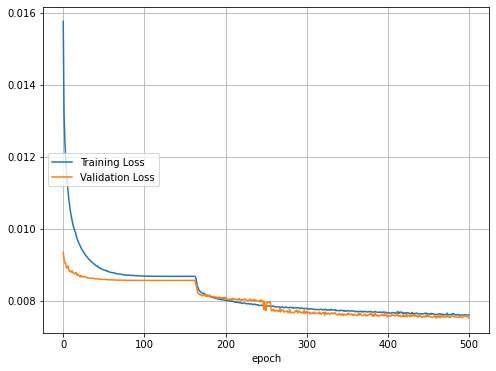

Epoch 502/1000:  train Loss: 0.0076   val Loss: 0.0075   time: 1.28s   best: 0.0075
Epoch 503/1000:  train Loss: 0.0076   val Loss: 0.0075   time: 1.32s   best: 0.0075
Epoch 504/1000:  train Loss: 0.0076   val Loss: 0.0075   time: 1.34s   best: 0.0075
Epoch 505/1000:  train Loss: 0.0076   val Loss: 0.0075   time: 1.31s   best: 0.0075
Epoch 506/1000:  train Loss: 0.0076   val Loss: 0.0075   time: 1.28s   best: 0.0075
Epoch 507/1000:  train Loss: 0.0076   val Loss: 0.0076   time: 1.28s   best: 0.0075
Epoch 508/1000:  train Loss: 0.0076   val Loss: 0.0076   time: 1.27s   best: 0.0075
Epoch 509/1000:  train Loss: 0.0076   val Loss: 0.0076   time: 1.26s   best: 0.0075
Epoch 510/1000:  train Loss: 0.0076   val Loss: 0.0076   time: 1.26s   best: 0.0075
Epoch 511/1000:  train Loss: 0.0076   val Loss: 0.0076   time: 1.28s   best: 0.0075
Epoch 512/1000:  train Loss: 0.0076   val Loss: 0.0076   time: 1.26s   best: 0.0075
Epoch 513/1000:  train Loss: 0.0076   val Loss: 0.0076   time: 1.26s   best:

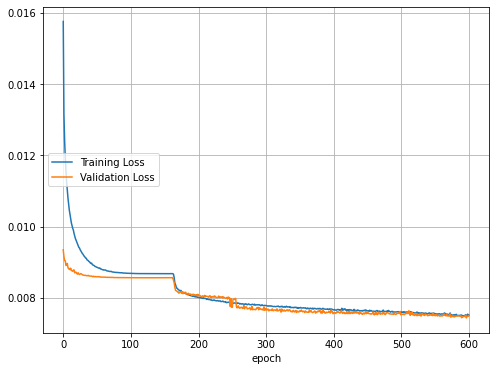

Epoch 602/1000:  train Loss: 0.0075   val Loss: 0.0075   time: 1.19s   best: 0.0074
Epoch 603/1000:  train Loss: 0.0075   val Loss: 0.0075   time: 1.19s   best: 0.0074
Epoch 604/1000:  train Loss: 0.0075   val Loss: 0.0075   time: 1.18s   best: 0.0074
Epoch 605/1000:  train Loss: 0.0075   val Loss: 0.0075   time: 1.18s   best: 0.0074
Epoch 606/1000:  train Loss: 0.0075   val Loss: 0.0074   time: 1.19s   best: 0.0074
Epoch 607/1000:  train Loss: 0.0075   val Loss: 0.0074   time: 1.22s   best: 0.0074
Epoch 608/1000:  train Loss: 0.0075   val Loss: 0.0074   time: 1.34s   best: 0.0074
Epoch 609/1000:  train Loss: 0.0075   val Loss: 0.0074   time: 1.29s   best: 0.0074
Epoch 610/1000:  train Loss: 0.0075   val Loss: 0.0074   time: 1.28s   best: 0.0074
Epoch 611/1000:  train Loss: 0.0075   val Loss: 0.0075   time: 1.30s   best: 0.0074
Epoch 612/1000:  train Loss: 0.0075   val Loss: 0.0074   time: 1.36s   best: 0.0074
Epoch 613/1000:  train Loss: 0.0075   val Loss: 0.0075   time: 1.32s   best:

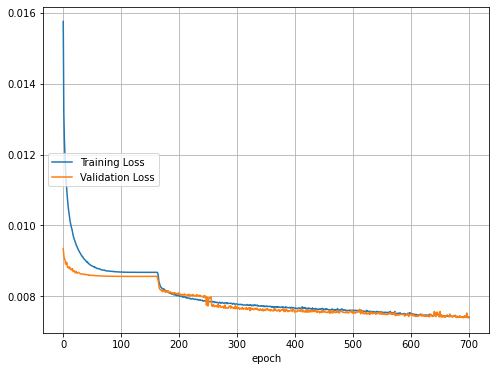

Epoch 702/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.28s   best: 0.0074
Epoch 703/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.29s   best: 0.0074
Epoch 704/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.27s   best: 0.0074
Epoch 705/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.29s   best: 0.0074
Epoch 706/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.28s   best: 0.0074
Epoch 707/1000:  train Loss: 0.0074   val Loss: 0.0075   time: 1.29s   best: 0.0074
Epoch 708/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.33s   best: 0.0074
Epoch 709/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.30s   best: 0.0074
Epoch 710/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.30s   best: 0.0074
Epoch 711/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.29s   best: 0.0074
Epoch 712/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.32s   best: 0.0074
Epoch 713/1000:  train Loss: 0.0074   val Loss: 0.0074   time: 1.33s   best:

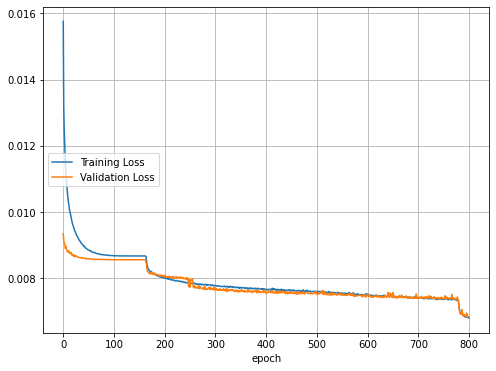

Epoch 802/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.28s   best: 0.0068
Epoch 803/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.29s   best: 0.0068
Epoch 804/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.27s   best: 0.0068
Epoch 805/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.25s   best: 0.0068
Epoch 806/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.26s   best: 0.0068
Epoch 807/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.25s   best: 0.0068
Epoch 808/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.26s   best: 0.0068
Epoch 809/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.24s   best: 0.0068
Epoch 810/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.25s   best: 0.0068
Epoch 811/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.26s   best: 0.0068
Epoch 812/1000:  train Loss: 0.0067   val Loss: 0.0068   time: 1.25s   best: 0.0068
Epoch 813/1000:  train Loss: 0.0068   val Loss: 0.0068   time: 1.26s   best:

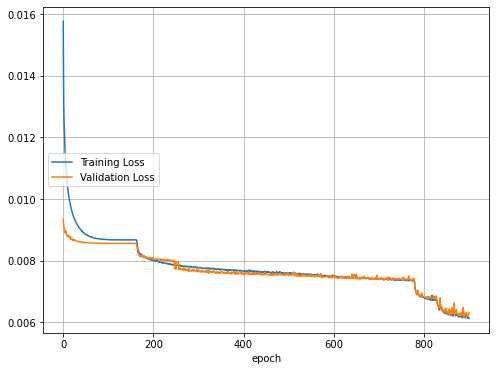

Epoch 902/1000:  train Loss: 0.0062   val Loss: 0.0062   time: 1.25s   best: 0.0062
Epoch 903/1000:  train Loss: 0.0062   val Loss: 0.0062   time: 1.25s   best: 0.0062
Epoch 904/1000:  train Loss: 0.0061   val Loss: 0.0062   time: 1.25s   best: 0.0062
Epoch 905/1000:  train Loss: 0.0062   val Loss: 0.0062   time: 1.24s   best: 0.0062
Epoch 906/1000:  train Loss: 0.0062   val Loss: 0.0062   time: 1.25s   best: 0.0062
Epoch 907/1000:  train Loss: 0.0061   val Loss: 0.0064   time: 1.25s   best: 0.0062
Epoch 908/1000:  train Loss: 0.0062   val Loss: 0.0063   time: 1.25s   best: 0.0062
Epoch 909/1000:  train Loss: 0.0062   val Loss: 0.0062   time: 1.24s   best: 0.0062
Epoch 910/1000:  train Loss: 0.0061   val Loss: 0.0062   time: 1.25s   best: 0.0062
Epoch 911/1000:  train Loss: 0.0061   val Loss: 0.0062   time: 1.25s   best: 0.0062
Epoch 912/1000:  train Loss: 0.0061   val Loss: 0.0062   time: 1.28s   best: 0.0062
Epoch 913/1000:  train Loss: 0.0061   val Loss: 0.0063   time: 1.28s   best:

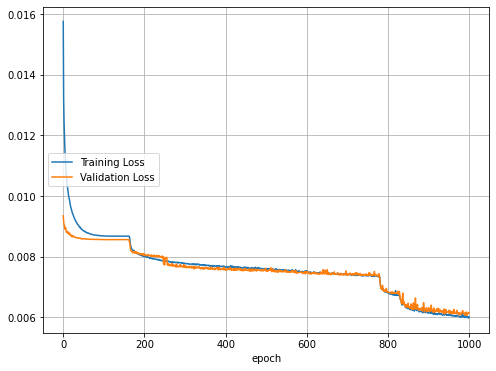

Training complete in 20m 45s   best validation loss: 0.0061


In [18]:
%run utils_MultiLabel_vs_Classical.py
input_size = 1272 

# Definition
model_MultiLabel = None 
model_MultiLabel = Model_Recursive_LSTM_v2(input_size,comp_embed_layer_sizes=[600, 900, 600, 400, 200], drops=[0.275, 0.4, 0.275, 0.175, 0.175], output_size=15)
model_MultiLabel.to(train_device)

criterion_15 = nn.L1Loss()

optimizer_15 = AdamW(model_MultiLabel.parameters(),weight_decay=0.375e-2)  

# Training

bl_dict={'train':train_bl_15, 'val':val_bl_15}
log_file_15 = 'log_15.txt'

losses_15, best_model_15 = train_model_multiLabel(model_MultiLabel, criterion_15, optimizer_15 , max_lr=0.001, dataloader=bl_dict,
                                 num_epochs=1000, logFile=log_file_15, log_every=500)

## Results

In [7]:
def accuracy(df):
    from sklearn.metrics import accuracy_score
    return accuracy_score(df['target'].values.tolist(), df['prediction'].values.tolist())*100


def hamming(df):
    from sklearn.metrics import hamming_loss
    return hamming_loss(df['target'].values.tolist(), df['prediction'].values.tolist())

def Zero_One(df):
    from sklearn.metrics import zero_one_loss
    return zero_one_loss(df['target'].values.tolist(), df['prediction'].values.tolist())

In [19]:
%run utils_MultiLabel_vs_Classical.py # imports and defines some utils functions

# Classical
val_df_106 = get_results_df_Classical(train_val_dataset_106, val_bl_106, val_indices_106, model_Classical)
test_df_106 = get_results_df_Classical(test_dataset_106, test_bl_106, test_indices_106, model_Classical)
train_df_106 = get_results_df_Classical(train_val_dataset_106, train_bl_106, train_indices_106, model_Classical)

# Multi-Label
val_df_15 = get_results_df_multiLabel(train_val_dataset_15, val_bl_15, val_indices_15, model_MultiLabel, threshhold = 0.5)
test_df_15 = get_results_df_multiLabel(test_dataset_15, test_bl_15, test_indices_15, model_MultiLabel, threshhold = 0.5)
train_df_15 = get_results_df_multiLabel(train_val_dataset_15, train_bl_15, train_indices_15, model_MultiLabel, threshhold = 0.5)

100%|██████████| 138/138 [00:00<00:00, 249.82it/s]


In [20]:
# Classical
print("Classical")
print( "train", accuracy(train_df_106), "val", accuracy(val_df_106), "test", accuracy(test_df_106) )

# Multi-Label
print("Multi-Label")
print( "train", accuracy(train_df_15), "val", accuracy(val_df_15), "test", accuracy(test_df_15) )

Classical
train 84.48055899036291 val 79.94182618607759 test 79.83193277310924
Multi-Label
train 69.58821566664703 val 65.65386580716167 test 68.40618600381329


## Evaluation on Benchmark

In [10]:
benchmark_dataset_file ='/data/mm12191/datasets/benchmarks_ds2.json'
# Classical
bench_ds_106, bench_bl_106, bench_indices_106, _, _ = load_merge_data_classical(None, benchmark_dataset_file, 1, filter_func_MC=filter_schedule_MC, filter_func_SC=filter_schedule_SC)
# Multi-label
bench_ds_15, bench_bl_15, bench_indices_15, _, _ = load_merge_data_multiLabel(None, benchmark_dataset_file, 1, filter_func_MC=filter_schedule_MC, filter_func_SC=filter_schedule_SC)

100%|██████████| 30/30 [00:00<00:00, 315.20it/s]


Number of batches 3
Data loaded
Sizes: (3, 0) batches


100%|██████████| 30/30 [00:00<00:00, 327.73it/s]

Number of batches 3
Data loaded
Sizes: (3, 0) batches


In [21]:
%run utils_MultiLabel_vs_Classical.py
# Classical
bench_df_106 = get_results_df_Classical(bench_ds_106, bench_bl_106, bench_indices_106, model_Classical)
# Multi-Label
bench_df_15 = get_results_df_multiLabel(bench_ds_15, bench_bl_15, bench_indices_15, model_MultiLabel, threshhold = 0.5)

100%|██████████| 3/3 [00:00<00:00, 496.84it/s]


In [22]:
# Classical
print("Classical")
print( "bench", accuracy(bench_df_106) )

# Multi-Label
print("Multi-Label")
print( "bench", accuracy(bench_df_15) )

Classical
bench 80.0
Multi-Label
bench 73.33333333333333


In [23]:
print( "hamming score   : train", hamming(train_df_15), "val", hamming(val_df_15), "test", hamming(test_df_15), "bench", hamming(bench_df_15) )
print( "Zero_One score   : train", Zero_One(train_df_15), "val", Zero_One(val_df_15), "test", Zero_One(test_df_15), "bench", Zero_One(bench_df_15) )

train 0.040549045777803945 val 0.04579484559045111 test 0.04212508532824895 bench 0.035555555555555556
train 0.30411784333352965 val 0.3434613419283833 test 0.31593813996186715 bench 0.2666666666666667


100%|██████████| 3/3 [00:00<00:00, 478.31it/s]


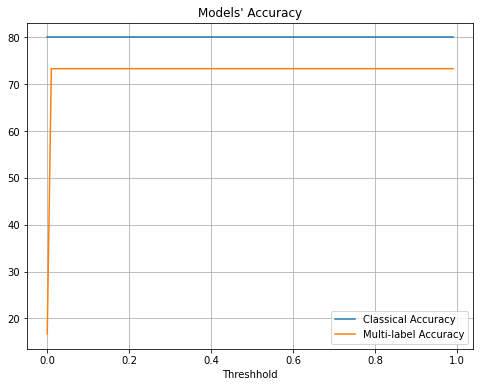

In [24]:
# On benchmark
%run utils_MultiLabel_vs_Classical.py
bench_df_106 = get_results_df_Classical(bench_ds_106, bench_bl_106, bench_indices_106, model_Classical)
Classical = []
multiLabel = []
I =[]
for i in range(0,100,1):
    bench_df_15 = get_results_df_multiLabel(bench_ds_15, bench_bl_15, bench_indices_15, model_MultiLabel, threshhold = i/100)
    I.append(i/100)
    multiLabel.append(accuracy(bench_df_15))
    Classical.append(accuracy(bench_df_106))
    


plt.figure(figsize=(8,6))
plt.plot(I,Classical, label='Classical Accuracy')
plt.plot(I,multiLabel, label='Multi-label Accuracy')
plt.title("Models' Accuracy")
plt.grid(True)
plt.xlabel('Threshhold')
plt.legend(loc='lower right') # the plot evolves to the right
plt.show();

100%|██████████| 22/22 [00:00<00:00, 354.86it/s]


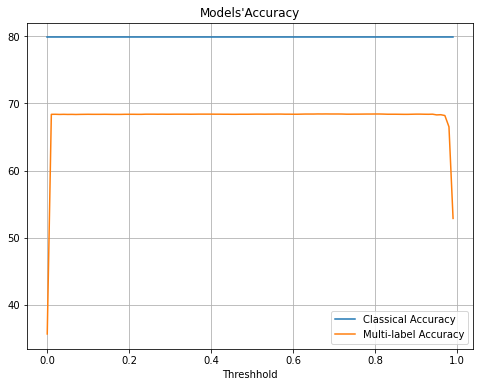

In [25]:
# Tests
%run utils_MultiLabel_vs_Classical.py
test_df_106 = get_results_df_Classical(test_dataset_106, test_bl_106, test_indices_106, model_Classical)
Classical = []
multiLabel = []
I =[]
for i in range(0,100,1):
    test_df_15 = get_results_df_multiLabel(test_dataset_15, test_bl_15, test_indices_15, model_MultiLabel, threshhold = i/100)
    I.append(i/100)
    multiLabel.append(accuracy(test_df_15))
    Classical.append(accuracy(test_df_106))
    
    
plt.figure(figsize=(8,6))
plt.plot(I,Classical, label='Classical Accuracy')
plt.plot(I,multiLabel, label='Multi-label Accuracy')
plt.title("Models'Accuracy")
plt.grid(True)
plt.xlabel('Threshhold')
plt.legend(loc='lower right') 
plt.show();

## Accuracy according to speedup

In [69]:
%run utils_MultiLabel_vs_Classical.py
df = test_df_106
ds = test_dataset_106

Acc_speed, ill = accuracy_speedup_Classical(df,ds, 0.1)
print("Classical", Acc_speed, ill)

df = test_df_15
ds = test_dataset_15
#ds = bench_ds_15

Acc_speed, ill = accuracy_speedup_MultiLabel(df,ds, 0.1)
print("MultiLabel", Acc_speed, ill)

Classical 87.29609490855165 0.9674458018501518
MultiLabel 66.6831438457736 0.2612809829814279


## Saving the models

In [16]:
torch.save(model_Classical.state_dict(), 'Models/Classical_MC.pkl')
torch.save(model_MultiLabel.state_dict(), 'Models/MultiLabel_MC.pkl')